In [1]:
# Updated plotting notebook
# Local imports
import argparse
import os
import sys
import time
import glob
import re

# Third party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
from datetime import datetime
import scipy.stats as stats

# Import cdo
from cdo import *
cdo = Cdo()

# Local imports
sys.path.append('/home/users/benhutch/skill-maps-historical')
import dictionaries as dic
import functions as fnc
import functions_skill_maps as fnc_sm

In [2]:
# Set up the parameters for the first historical run
# psl year 2-9 DJFM global
variable = 'psl'
region = 'global'
region_grid = dic.gridspec_global
season = 'DJFM'
forecast_range = '2-9'
observations_path = dic.obs
obs_var_name = 'psl'
start_year = 1960
end_year = 2014
# exclude EC-Earth3 as time period not long enough
models = dic.psl_models


In [3]:
# Process the observations
# for year 2-9 DJFM global psl
obs = fnc.process_observations(variable, region, region_grid,
                                forecast_range, season, observations_path,
                                    obs_var_name)

File already exists
Loading ERA5 data
Regridded and selected region dataset: <xarray.DataArray 'time' (time: 259)>
array(['1959-01-01T00:00:00.000000000', '1959-02-01T00:00:00.000000000',
       '1959-03-01T00:00:00.000000000', ..., '2023-01-01T00:00:00.000000000',
       '2023-02-01T00:00:00.000000000', '2023-03-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1959-01-01 1959-02-01 ... 2023-03-01
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T
Forecast range: 2 - 9
Rolling mean range: 8


In [4]:
# Load the processed historical data
historical_data = fnc.load_processed_historical_data(dic.base_dir_historical,
                                                        models, variable,
                                                            region, forecast_range,
                                                                season)

processing model:  BCC-CSM2-MR
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/psl/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/processed/*.nc
loading variant_label:  r1i1p1f1
loading variant_label:  r2i1p1f1
loading variant_label:  r3i1p1f1
processing model:  MPI-ESM1-2-HR
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/psl/MPI-ESM1-2-HR/global/years_2-9/DJFM/outputs/processed/*.nc


loading variant_label:  r1i1p1f1
processing model:  CanESM5
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/psl/CanESM5/global/years_2-9/DJFM/outputs/processed/*.nc
loading variant_label:  r10i1p1f1
loading variant_label:  r10i1p2f1
loading variant_label:  r11i1p1f1
loading variant_label:  r12i1p1f1
loading variant_label:  r13i1p1f1
loading variant_label:  r14i1p1f1
loading variant_label:  r15i1p1f1
loading variant_label:  r16i1p1f1
loading variant_label:  r17i1p1f1
loading variant_label:  r18i1p1f1
loading variant_label:  r19i1p1f1
loading variant_label:  r1i1p1f1
loading variant_label:  r1i1p2f1
loading variant_label:  r20i1p1f1
loading variant_label:  r21i1p1f1
loading variant_label:  r22i1p1f1
loading variant_label:  r23i1p1f1
loading variant_label:  r24i1p1f1
loading variant_label:  r25i1p1f1
loading variant_label:  r2i1p1f1
loading variant_label:  r2i1p2f1
loading variant_label:  r3i1p1f1
loading variant_label:  r3i1p2f1
loading variant_label:  r4i1p1f1
loa

In [5]:
# Extract the variable data from the historical data
historical_data, historical_time = fnc.extract_historical_data(historical_data, 
                                                                variable)

processing model:  BCC-CSM2-MR
processing member:  <xarray.Dataset>
Dimensions:  (lon: 144, lat: 72, time: 48)
Coordinates:
  * lon      (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 80.0 82.5 85.0 87.5
  * time     (time) object 1964-12-31 00:00:00 ... 2011-12-31 00:00:00
Data variables:
    psl      (time, lat, lon) float32 dask.array<chunksize=(48, 45, 45), meta=np.ndarray>
Attributes: (12/51)
    CDI:                    Climate Data Interface version 2.0.4 (https://mpi...
    Conventions:            CF-1.7 CMIP-6.2
    source:                 BCC-CSM 2 MR (2017):   aerosol: none  atmos: BCC_...
    institution:            Beijing Climate Center, Beijing 100081, China
    activity_id:            CMIP
    branch_method:          Standard
    ...                     ...
    tracking_id:            hdl:21.14100/50edc5e7-26be-42cd-9794-bc0a36dec851
    variable_id:            psl
    variant_label:          r

<xarray.Dataset>
Dimensions:  (lon: 144, lat: 72, time: 48)
Coordinates:
  * lon      (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 80.0 82.5 85.0 87.5
  * time     (time) datetime64[ns] 1964-12-31 1965-12-31 ... 2011-12-31
Data variables:
    psl      (time, lat, lon) float32 dask.array<chunksize=(48, 45, 45), meta=np.ndarray>
Attributes: (12/46)
    CDI:                    Climate Data Interface version 2.0.4 (https://mpi...
    source:                 MIROC6 (2017): \naerosol: SPRINTARS6.0\natmos: CC...
    institution:            JAMSTEC (Japan Agency for Marine-Earth Science an...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    ...                     ...
    variable_id:            psl
    variant_label:          r26i1p1f1
    license:                CMIP6 model data produced by MIROC is licensed un...
    cmor_version:           3.5

In [6]:
# model='EC-Earth3'
# print(model, historical_data[model])

In [7]:
# Calculate the spatial correlations for the historical data DJFM year 2-9 global psl
rfield, pfield, obs_lons_converted, lons_converted, observed_data, ensemble_mean, ensemble_members_count = fnc.calculate_spatial_correlations(obs, 
                                                                                                                                                historical_data, 
                                                                                                                                                    models, 
                                                                                                                                                        variable)

extracting data for model: BCC-CSM2-MR
extracting data for model: MPI-ESM1-2-HR
extracting data for model: CanESM5
extracting data for model: CMCC-CM2-SR5
extracting data for model: HadGEM3-GC31-MM
extracting data for model: MPI-ESM1-2-LR
extracting data for model: FGOALS-f3-L
extracting data for model: MIROC6
extracting data for model: IPSL-CM6A-LR
extracting data for model: NorCPM1
var name for obs msl
observed data shape (48, 72, 144)
model data shape (48, 72, 144)
observed data type <class 'numpy.ndarray'>
model data type <class 'numpy.ndarray'>
Correlation coefficients range from -0.842 to 0.971
P-values range from 0.000 to 1.000


In [8]:
# extract the start and end years for the historical data
start_year = observed_data.time.dt.year[0].values
end_year = observed_data.time.dt.year[-1].values

# print these
print('start year', start_year)
print('end year', end_year)

start year 1964
end year 2011


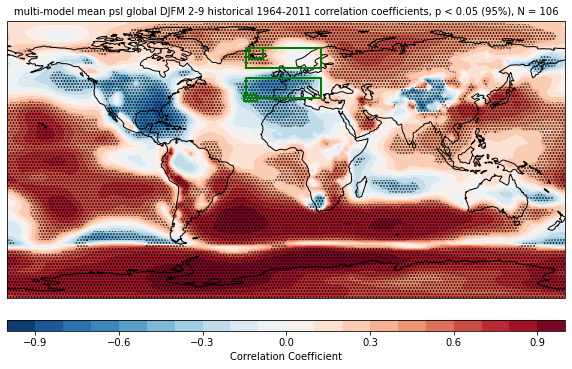

In [9]:
# This function is from the other functions file
fnc_sm.plot_correlations(models, rfield, pfield, obs, variable, region,
                            season, forecast_range, dic.plots_dir, obs_lons_converted,
                                lons_converted, dic.azores_grid, dic.iceland_grid,
                                    dic.uk_n_box, dic.uk_s_box, experiment='historical', 
                                        observed_data=observed_data, ensemble_members_count=ensemble_members_count)

extracting data for model: BCC-CSM2-MR
var name for obs msl
Correlation coefficients range from -0.698 to 0.958
P-values range from 0.000 to 1.000
extracting data for model: MPI-ESM1-2-HR
var name for obs msl
Correlation coefficients range from -0.913 to 0.837
P-values range from 0.000 to 0.999
extracting data for model: CanESM5
var name for obs msl
Correlation coefficients range from -0.916 to 0.973
P-values range from 0.000 to 0.999
extracting data for model: CMCC-CM2-SR5
var name for obs msl
Correlation coefficients range from -0.731 to 0.913
P-values range from 0.000 to 1.000
extracting data for model: HadGEM3-GC31-MM
var name for obs msl
Correlation coefficients range from -0.764 to 0.954
P-values range from 0.000 to 0.999
extracting data for model: MPI-ESM1-2-LR
var name for obs msl
Correlation coefficients range from -0.723 to 0.920
P-values range from 0.000 to 1.000
extracting data for model: FGOALS-f3-L
var name for obs msl
Correlation coefficients range from -0.748 to 0.910
P

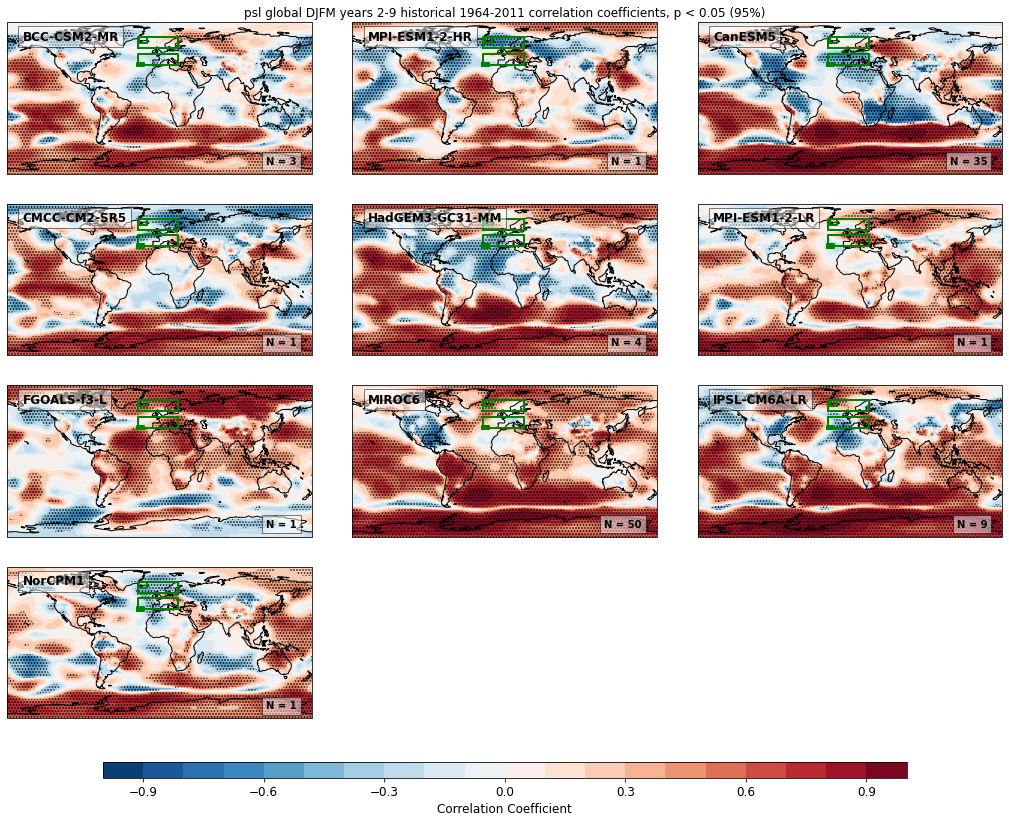

In [10]:
# Plot the correlations for the individual models
fnc_sm.plot_correlations_subplots(models, obs, historical_data, variable, region,
                                    season, forecast_range, dic.plots_dir, dic.azores_grid,
                                        dic.iceland_grid, dic.uk_n_box, dic.uk_s_box,
                                            experiment='historical', observed_data=observed_data)